In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'disease heart.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [3]:
# Display the summary statistics of the dataset
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [4]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
# null impiutation with median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [13]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

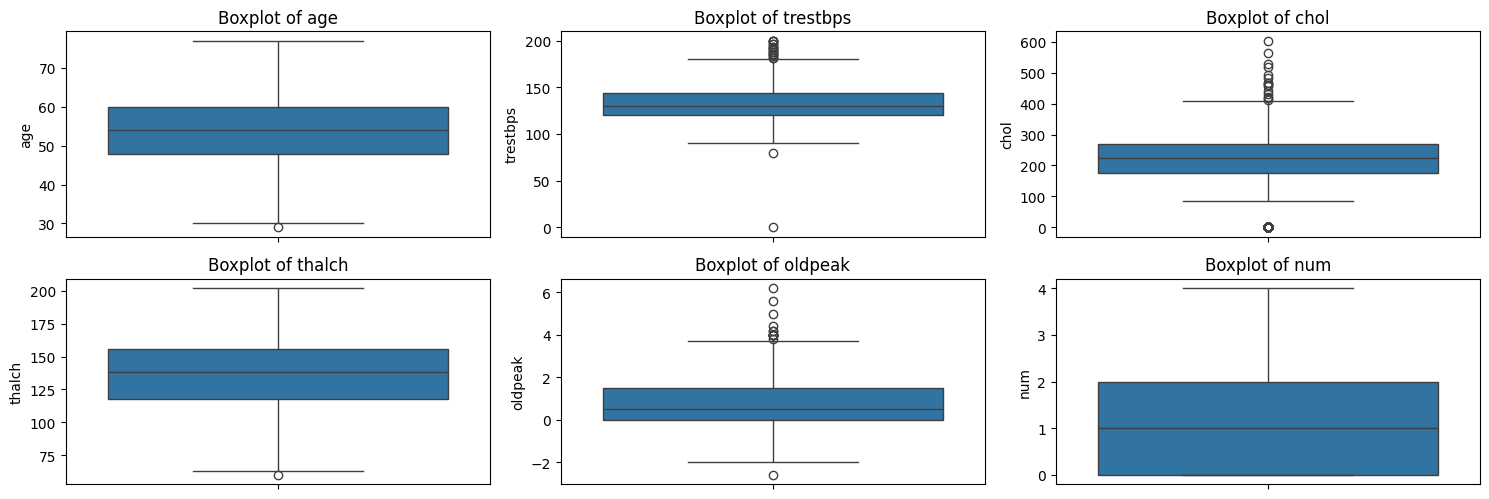

In [14]:
# Detect outliers using box plots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

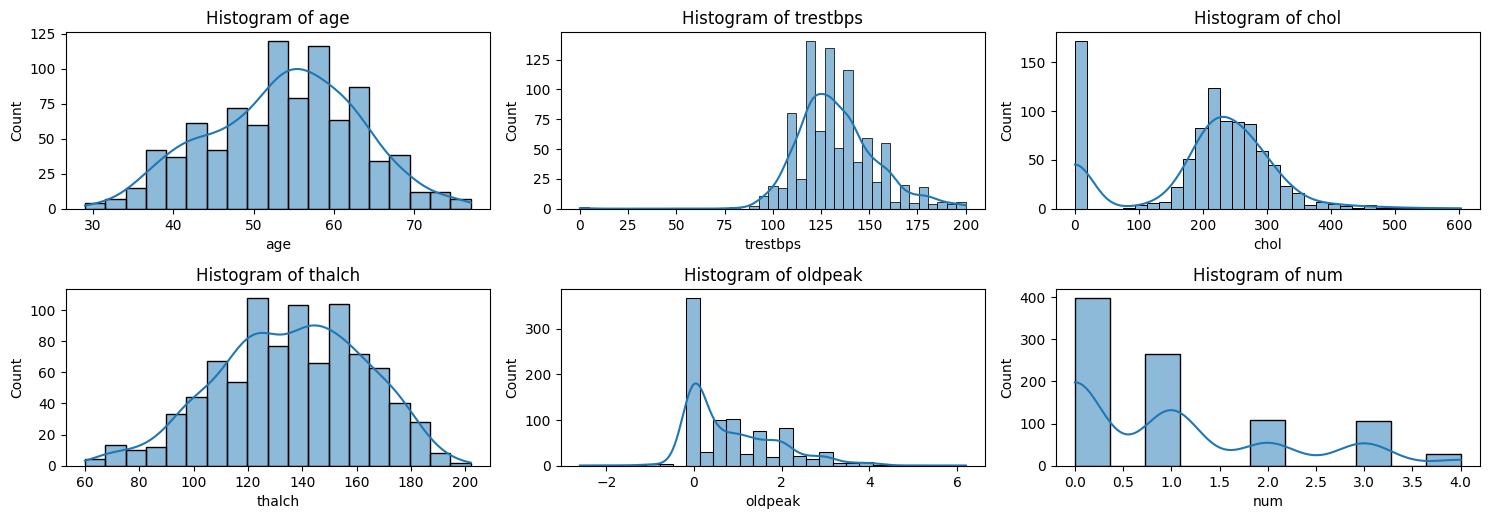

In [15]:
# Visualize the distribution of numerical features using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


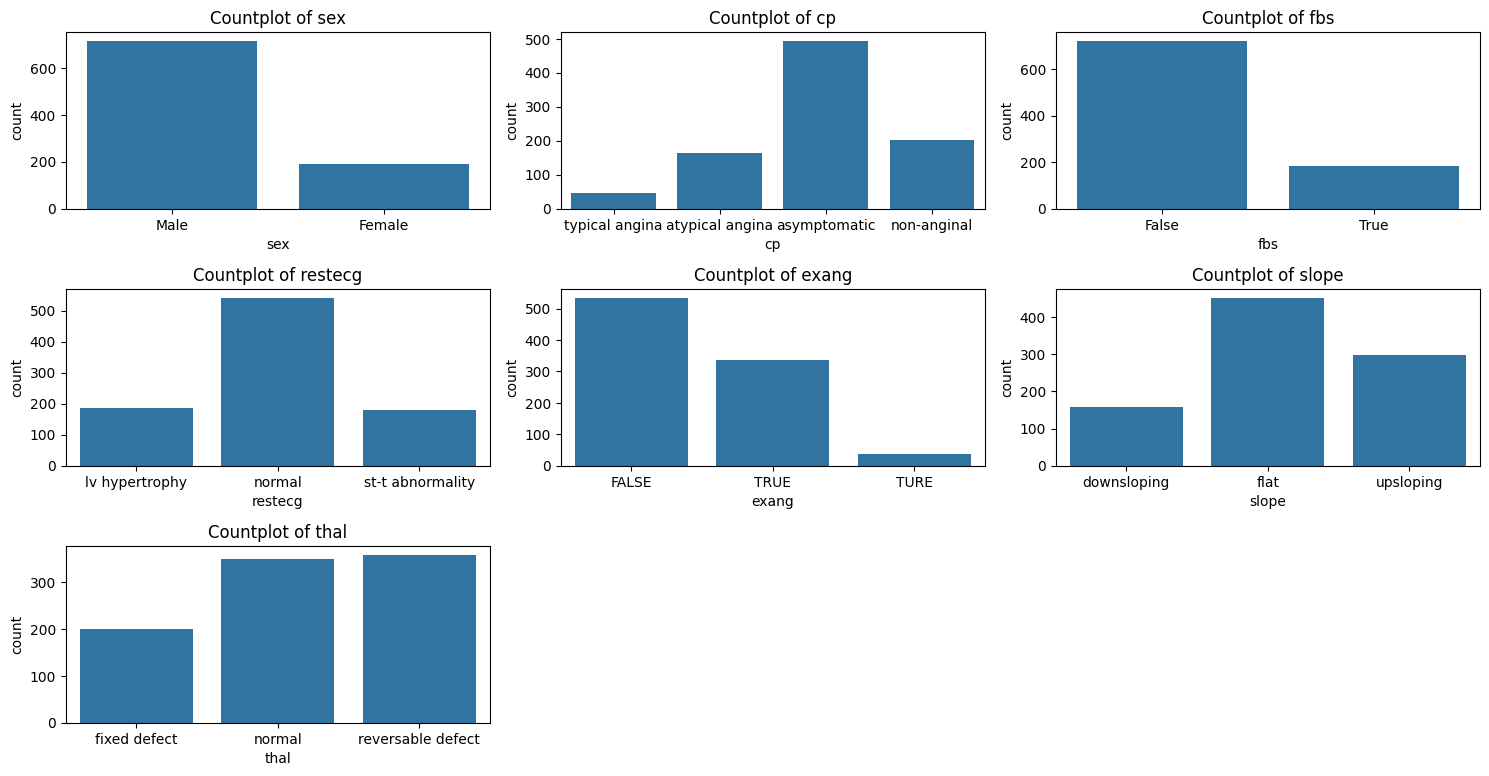

In [16]:
# Visualize the distribution of categorical features using count plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
plt.tight_layout()
plt.show()


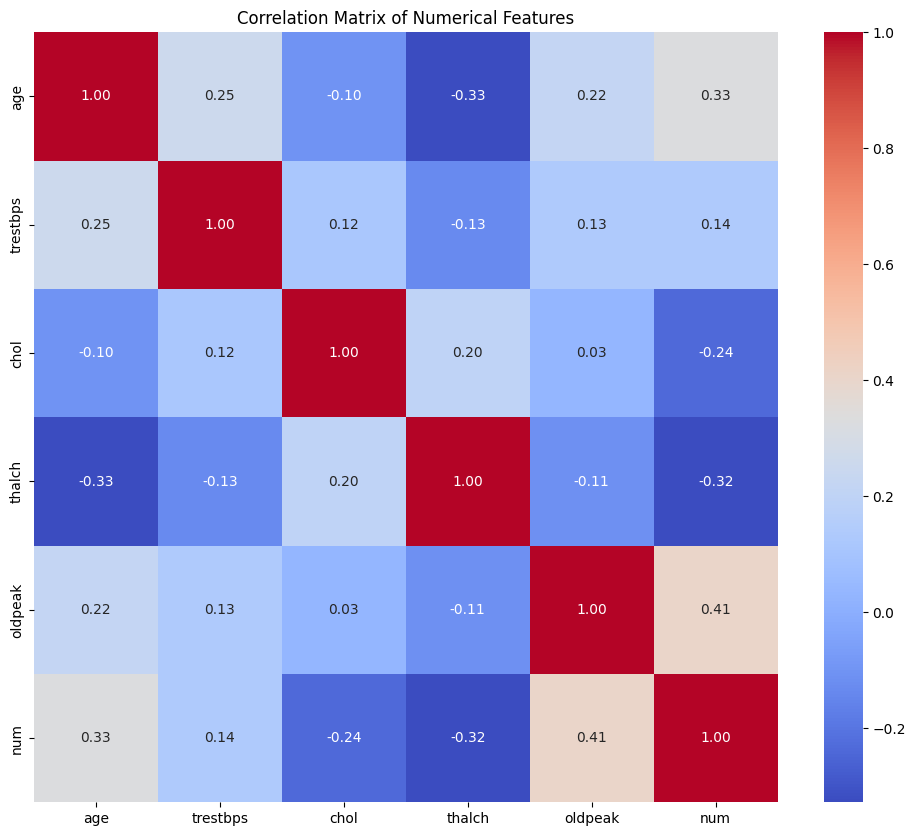

In [17]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Handling categorical variables  using Label Encoding
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scaling numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the processed data
print(df.head())


        age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang  \
0  1.006027    1   3  0.567394  0.281297    1        0  0.524183      0   
1 -1.397560    1   1  0.076967  0.013526    0        1 -0.147705      0   
2  0.350503    1   0  0.322181 -0.084656    0        1  0.449529      0   
3 -0.195767    1   3 -0.756760 -0.138211    0        0  2.017268      0   
4  0.350503    1   0 -1.149102 -0.004325    0        1 -0.371668      1   

    oldpeak  slope  thal       num  
0  1.354403      0     0 -0.881977  
1 -0.815718      1     0 -0.881977  
2 -0.438305      1     0 -0.881977  
3 -0.815718      1     0 -0.881977  
4  0.599578      1     0 -0.881977  


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Ensure the target variable 'num' is categorical
y = df['num'].astype(int)

# Split the dataset into features and target variable
X = df.drop(columns=['num'])  # Assuming 'num' is the target column

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       159
           1       0.06      0.06      0.06        17
           2       0.00      0.00      0.00         6

    accuracy                           0.79       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.76      0.79      0.77       182

Confusion Matrix:
 [[142  15   2]
 [ 16   1   0]
 [  6   0   0]]


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Set Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.8237128011336796
Test Set Accuracy with Best Model: 0.8241758241758241


The model achieved an accuracy of ~78.57% on the test set.

precision: Measures how many of the predicted positive instances were actually positive. The precision for class 0 (no heart disease) is high at 0.87.

Recall: Measures how many actual positive instances were correctly predicted. The recall for class 0 is high at 0.89.

F1-Score: The harmonic mean of precision and recall. The F1-score for class 0 is 0.88.

The confusion matrix shows that the majority of instances are correctly classified as class 0.

The final accuracy on the test set using the best model was ~82.42%, which shows some improvement.



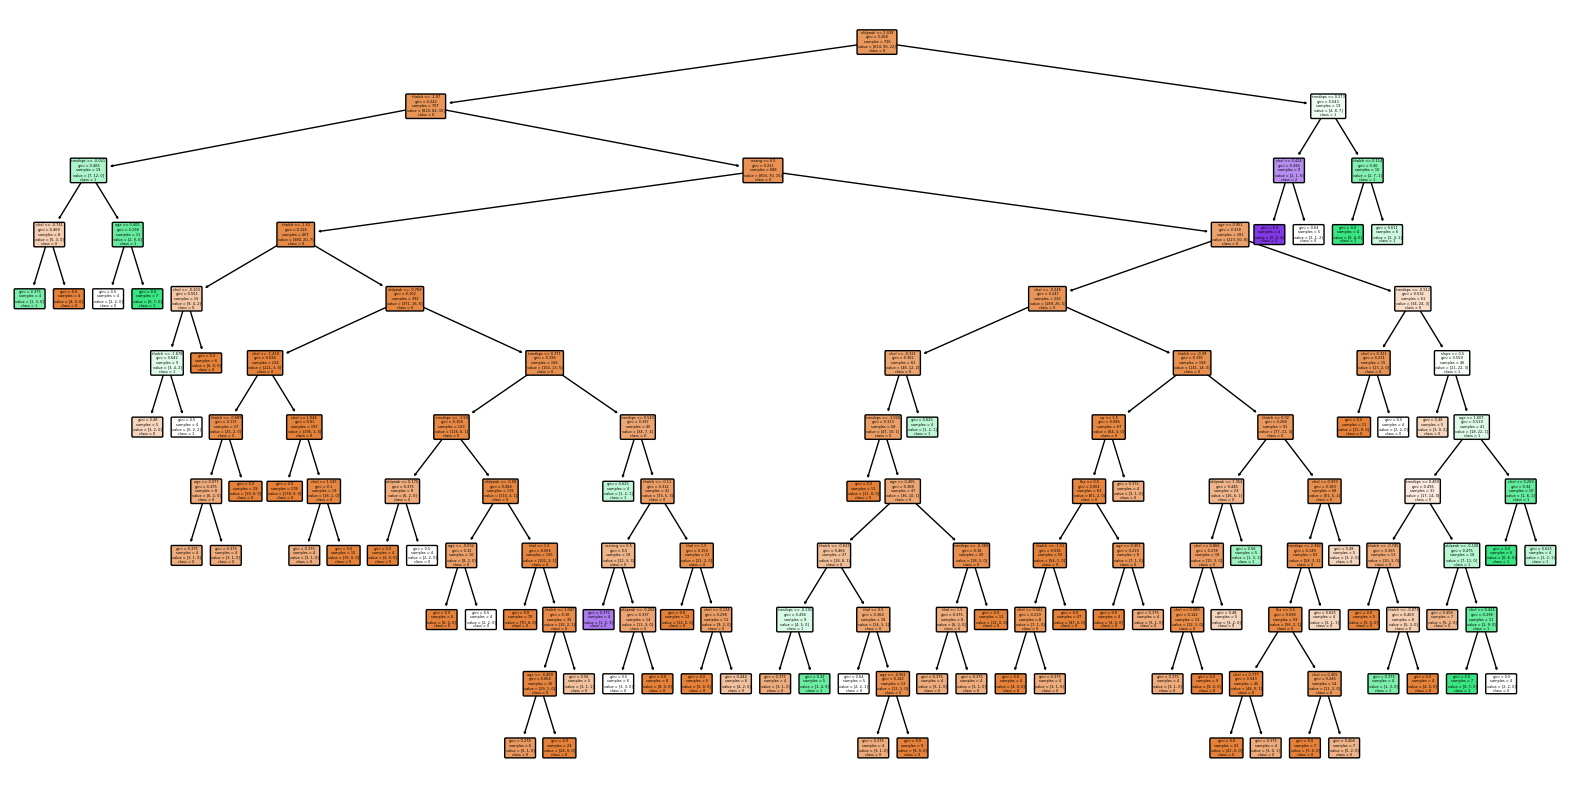

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True)
plt.show()


In [27]:
# Feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. Feature thalch (0.22121833175753988)
2. Feature oldpeak (0.1929292606759289)
3. Feature trestbps (0.1684641758570342)
4. Feature chol (0.15637995953177344)
5. Feature age (0.13515511293898336)
6. Feature exang (0.05466732388329745)
7. Feature restecg (0.02521378374883743)
8. Feature thal (0.019509785970946027)
9. Feature slope (0.018349837256828587)
10. Feature fbs (0.004869170487082805)
11. Feature cp (0.0032432578917478273)
12. Feature sex (0.0)


1) In decision tree models, several hyperparameters can significantly impact performance. Here are some common ones:

Maximum Depth (max_depth): This controls the maximum depth of the tree. A deeper tree can model more complex relationships but may lead to overfitting. A shallower tree may underfit the data.

Minimum Samples Split (min_samples_split): This specifies the minimum number of samples required to split an internal node. Increasing this value can prevent the model from creating splits that are too specific to the training data, thus reducing overfitting.

Minimum Samples Leaf (min_samples_leaf): This is the minimum number of samples required to be at a leaf node. Setting this parameter can help ensure that leaf nodes contain a sufficient number of samples, which can make the model more generalizable.

Maximum Features (max_features): This determines the number of features to consider when looking for the best split. Limiting the number of features can help reduce overfitting and improve generalization by introducing more diversity in the splits.

Maximum Leaf Nodes (max_leaf_nodes): This specifies the maximum number of leaf nodes in the tree. Limiting the number of leaf nodes can help control the size of the tree and prevent overfitting.

Criterion (criterion): This determines the function to measure the quality of a split. Common criteria are Gini impurity and entropy (for classification) or mean squared error (for regression). The choice of criterion can affect how the splits are made and thus the overall performance of the model.

Splitter (splitter): This determines the strategy used to choose the split at each node. Options are 'best' (to find the best split) and 'random' (to choose a random split). Using 'random' can make the model more robust by reducing the likelihood of overfitting.

2) Label Encoding
What It Is: Label encoding assigns each unique category in a feature to an integer. For example, if you have a feature "Color" with categories ["Red", "Green", "Blue"], label encoding would convert these to integers [0, 1, 2].

When to Use: Label encoding is often used for ordinal categorical data, where there is an inherent order (e.g., "Low", "Medium", "High"). It is not typically used for nominal data where categories have no natural order, as it might introduce misleading relationships between categories.

One-Hot Encoding
What It Is: One-hot encoding converts each category into a binary vector. Each category is represented as a vector where only one element is 1 (hot) and all others are 0. For example, "Color" with categories ["Red", "Green", "Blue"] would be converted into three binary columns, one for each color.

When to Use: One-hot encoding is typically used for nominal categorical data where there is no meaningful order between categories. It avoids the issue of introducing ordinal relationships that label encoding can create.